In [1]:
using CSV

function dist(x,y)
    (x-y)^2
end

function get_min(m₀, m₁, m₂, i, j)
    if m₀ < m₁
        m₀ < m₂ && return i-1, j, m₀
        return i-1, j-1, m₂
    else
        m₁ < m₂ && return i, j-1, m₁
        return i-1, j-1, m₂
    end
end

function spring(x, y, ϵ)
    pathes = []

    Tx = length(x)
    Ty = length(y)

    C = zeros(Float64, (Tx, Ty))
    B = ones(Int64, (Tx, Ty, 2))
    S = ones(Int64, (Tx, Ty))

    C[1,1] = dist(x[1], y[1])

    for j in 2:Ty
        C[1, j] = C[1, j-1] + dist(x[1], y[j])
        S[1, j] = 1
        B[1, j, :] = [1, j-1]
    end

    for i in 2:Tx
        C[i, 1] = dist(x[i], y[1])
        S[i, 1] = i
        B[i, 1, :] = [1, 1]

        for j in 2:Ty
            pi, pj, m = get_min(C[i-1, j],
                                C[i, j-1],
                                C[i-1, j-1],
                                i, j)
            C[i,j] = dist(x[i], y[j]) + m
            B[i,j,:] = [pi, pj]
            S[i,j] = S[pi, pj]
        end

        imin = argmin(C[1:i, end])
        dmin = C[imin, end]

        dmin > ϵ && continue

        for j in 2:Ty
            if (C[i,j] < dmin) && (S[i,j] < imin) && @goto yet
            end
        end

        path = []
        push!(path, [imin, Ty])
        tempᵢ = imin
        tempⱼ = Ty

        while (B[tempᵢ, tempⱼ, 1] != 1 || B[tempᵢ, tempⱼ, 2] != 1)
            push!(path, B[tempᵢ, tempⱼ, :])
            tempᵢ, tempⱼ = B[tempᵢ, tempⱼ, :]
        end

        C[S .<= imin] .= Inf
        push!(pathes, path)
        @label yet
    end
    return pathes, C
end


spring (generic function with 1 method)

In [2]:
df = CSV.read("./data.csv", header=false, delim=",")
data = df[2]
x = data[1:4:1000]
y = data[1000:4:end]
ϵ = 80

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[2]:2
└ @ Core In[2]:2


80

In [3]:
using Profile

In [9]:
@profile pathes,C = spring(x, y, ϵ);

In [10]:
pathes

2-element Array{Any,1}:
 Any[[86, 25], [86, 24], [86, 23], [86, 22], [86, 21], [86, 20], [85, 19], [85, 18], [85, 17], [85, 16]  …  [74, 7], [73, 7], [72, 7], [71, 7], [70, 6], [69, 5], [69, 4], [68, 3], [68, 2], [68, 1]]                    
 Any[[180, 25], [180, 24], [180, 23], [180, 22], [180, 21], [180, 20], [179, 19], [178, 19], [177, 18], [177, 17]  …  [170, 7], [169, 7], [168, 6], [167, 5], [167, 4], [167, 3], [166, 2], [165, 2], [164, 2], [163, 1]]

In [6]:
#using Plots
#gr() 

# import Pkg; Pkg.add("PyPlot")
using PyPlot
using PyCall

gridspec = pyimport("matplotlib.gridspec")
# @pyimport matplotlib.gridspec as gspec


PyObject <module 'matplotlib.gridspec' from '/home/kei/.local/lib/python3.6/site-packages/matplotlib/gridspec.py'>

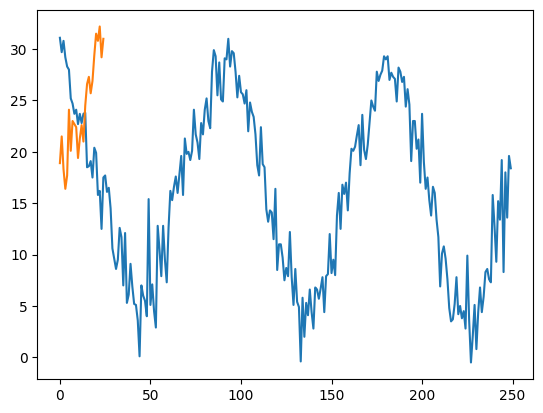

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f562d0af780>

In [7]:
plot(x)
plot(y)

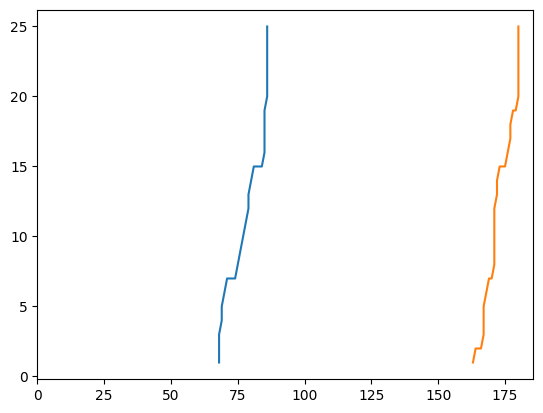

(0.0, 185.6)

In [8]:
for path in pathes[1:end]
    temp_path = hcat(path...);
    temp = plot(temp_path[1, :], temp_path[2, :])
end
xlim(0, )